Dataset Shape: (178, 13)


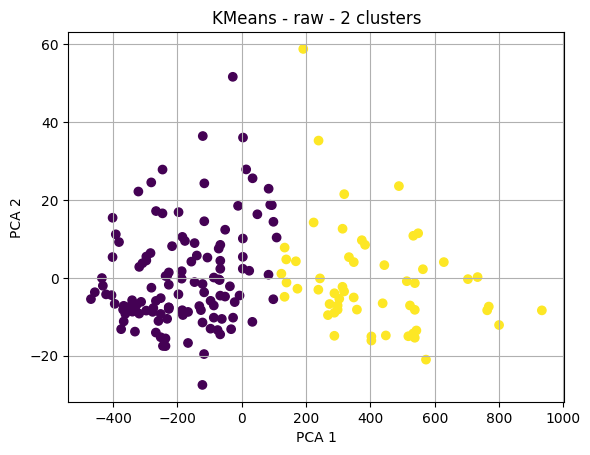

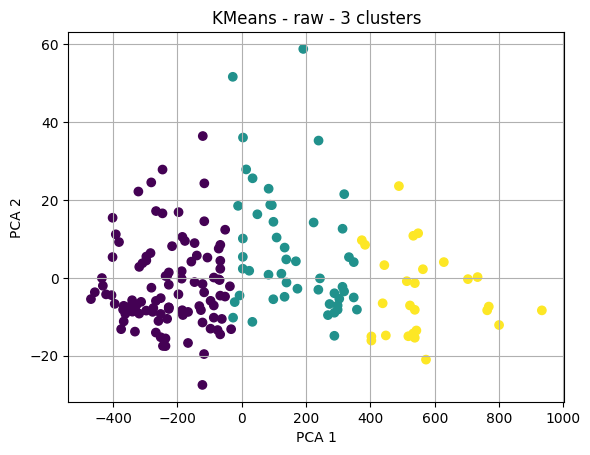

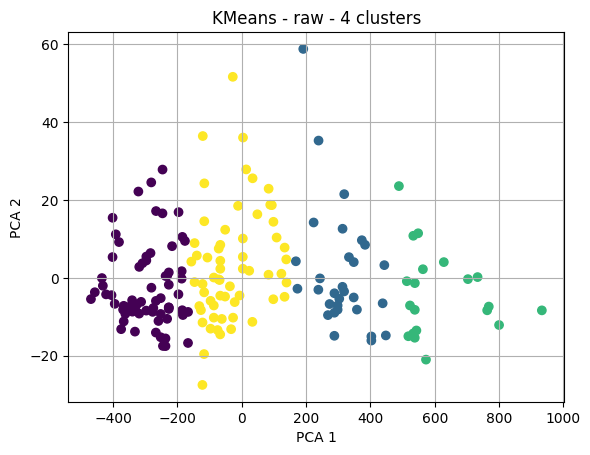

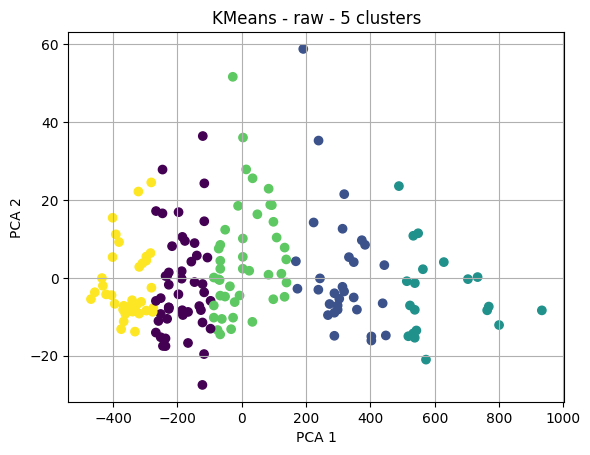

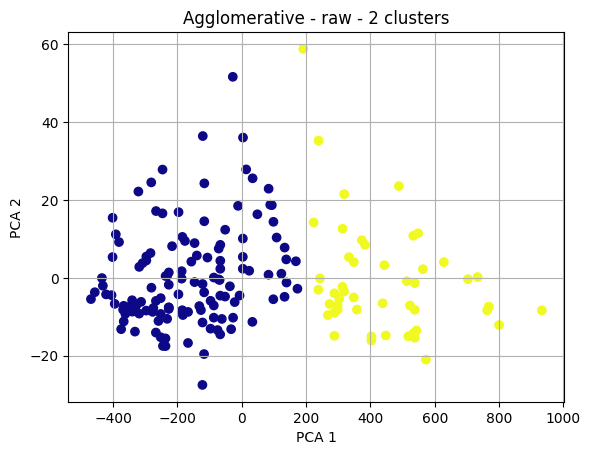

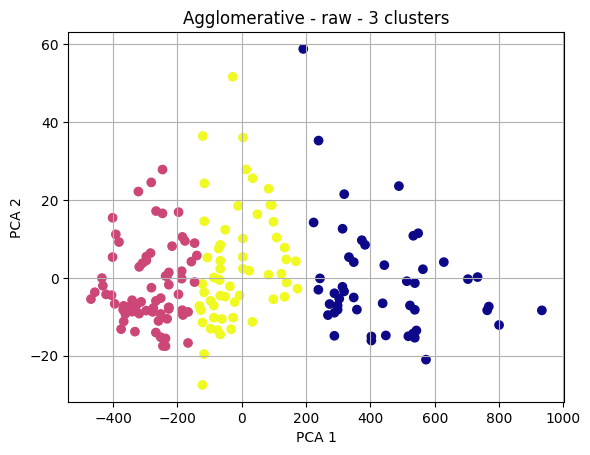

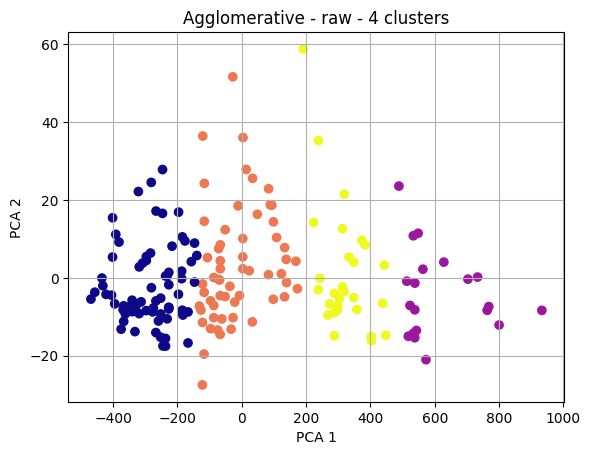

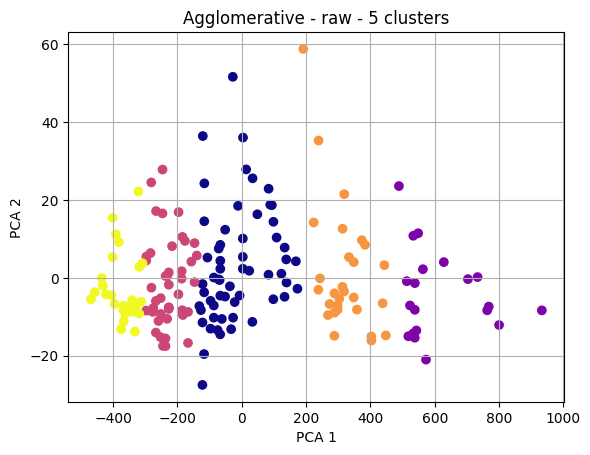

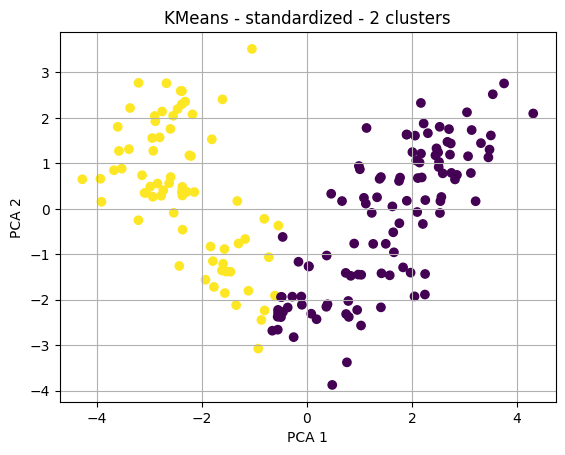

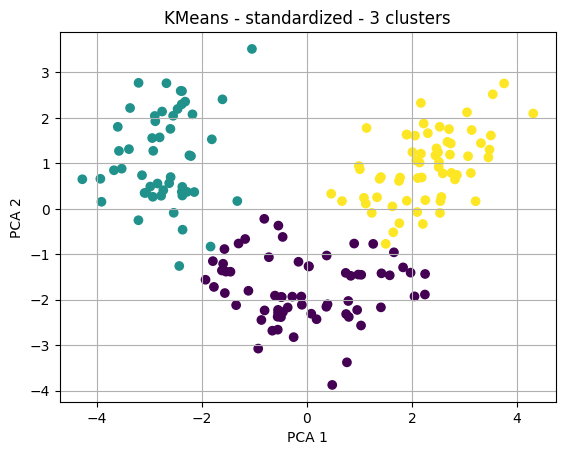

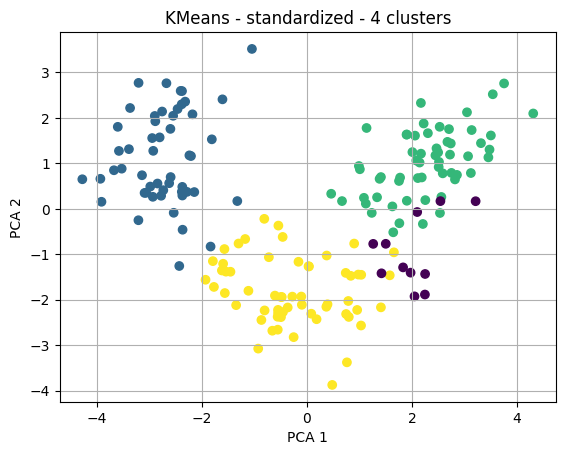

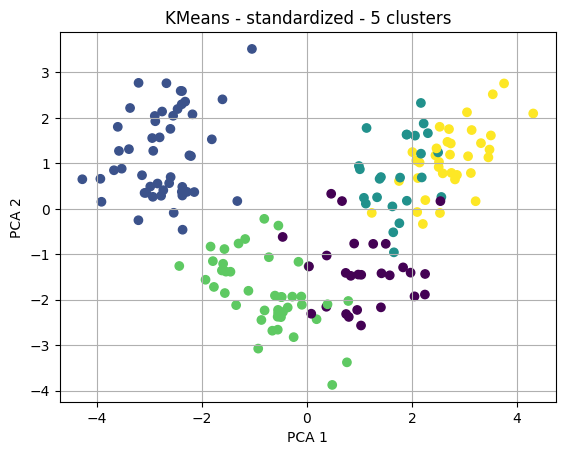

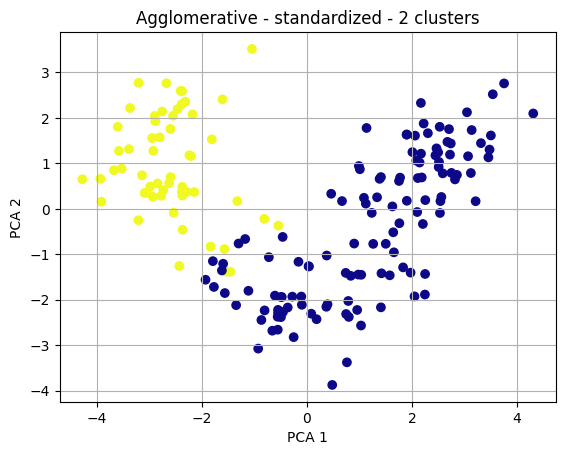

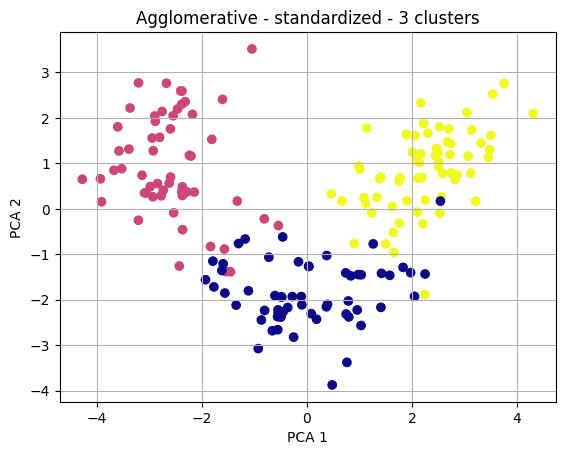

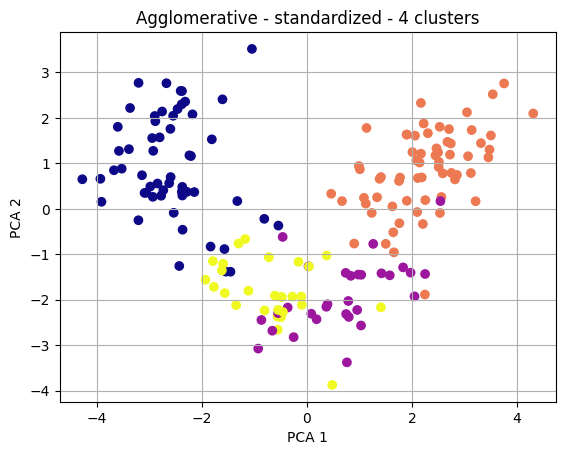

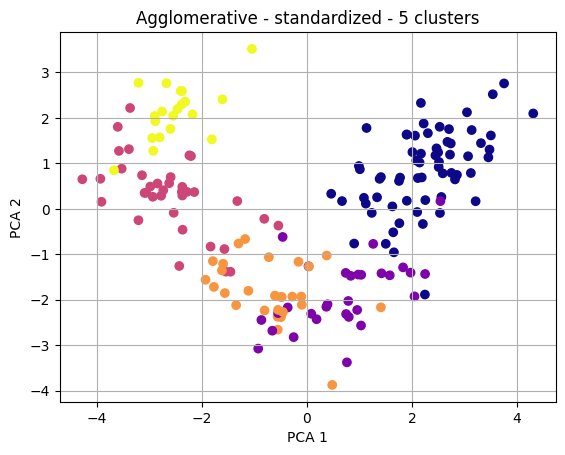

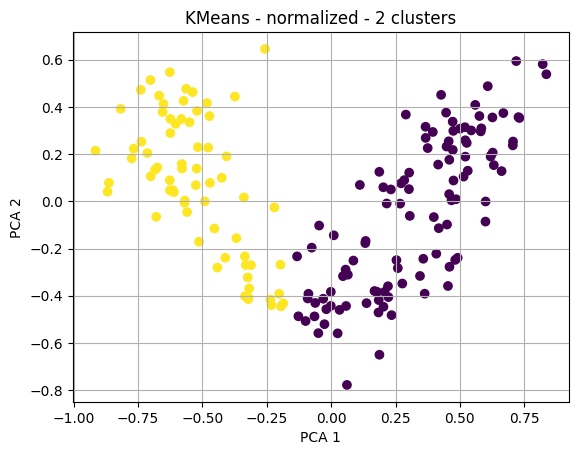

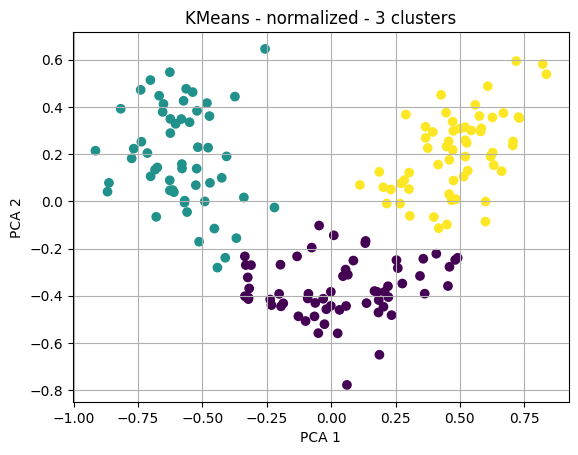

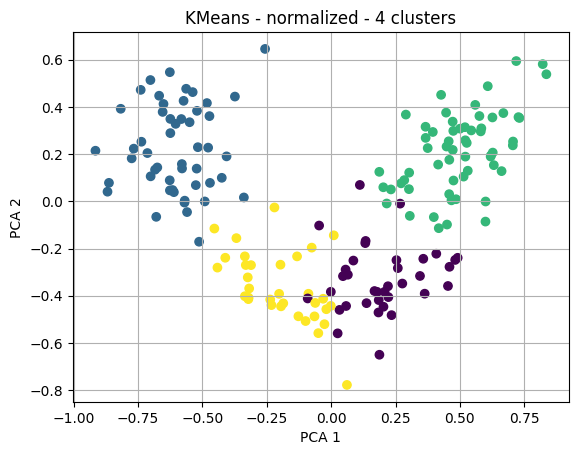

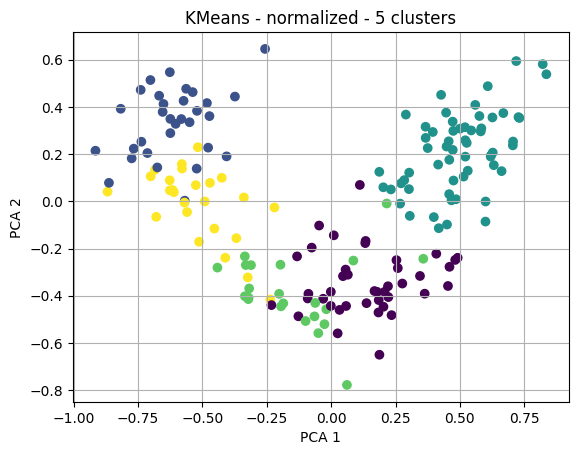

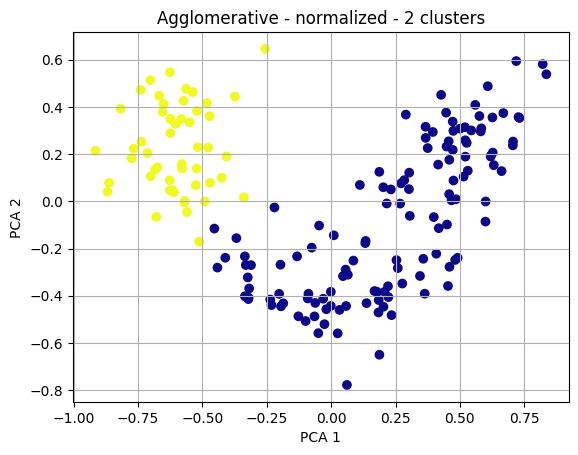

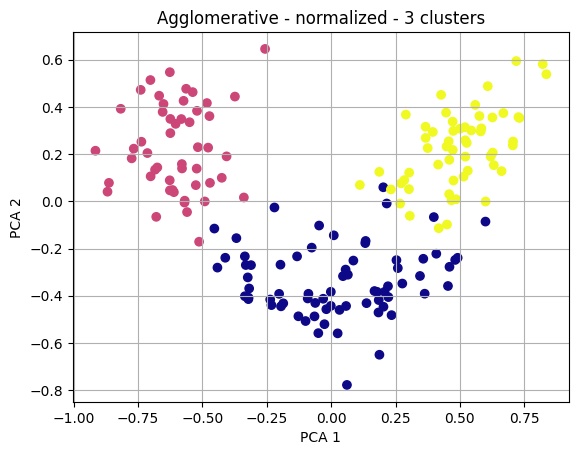

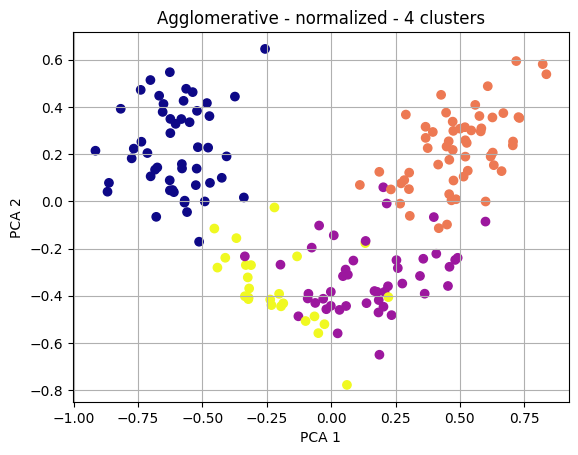

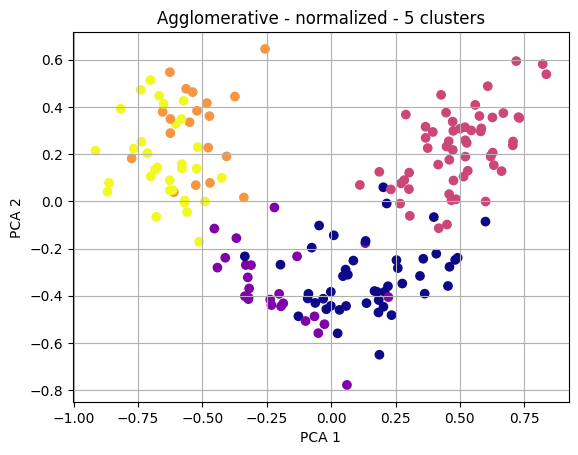

,Method,Algorithm,Clusters,Silhouette,DB Index,CH Index
0,raw,KMeans,2,0.657,0.479,505.429
1,raw,KMeans,3,0.560,0.550,497.005
2,raw,KMeans,4,0.567,0.549,696.839
3,raw,KMeans,5,0.508,0.574,745.197
4,raw,Agglomerative,2,0.659,0.459,483.113
5,raw,Agglomerative,3,0.564,0.536,552.852
6,raw,Agglomerative,4,0.561,0.554,670.626
7,raw,Agglomerative,5,0.507,0.551,684.223
8,standardized,KMeans,2,0.265,1.494,69.092
9,standardized,KMeans,3,0.285,1.389,70.940


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

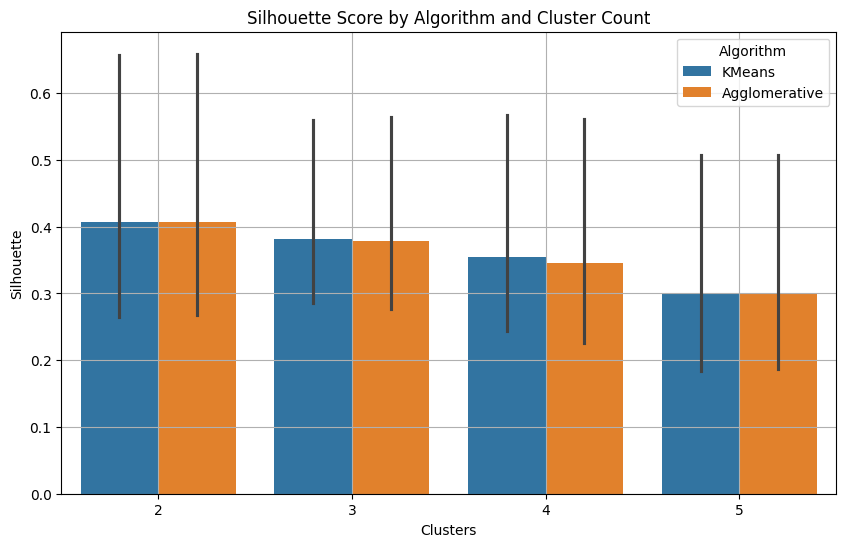

In [2]:
# Clustering Assignment - Wine Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target  # ground truth for comparison

# Display dataset info
print("Dataset Shape:", X.shape)
X.head()

# Preprocessing techniques
preprocessing_methods = {
    "raw": X.copy(),
    "standardized": StandardScaler().fit_transform(X),
    "normalized": MinMaxScaler().fit_transform(X),
}

# Function to run clustering and evaluate
def evaluate_clustering(X, method_name):
    results = []
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    for n_clusters in range(2, 6):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)
        results.append({
            "Method": method_name,
            "Algorithm": "KMeans",
            "Clusters": n_clusters,
            "Silhouette": silhouette_score(X, labels),
            "DB Index": davies_bouldin_score(X, labels),
            "CH Index": calinski_harabasz_score(X, labels)
        })

        # Plot PCA
        plt.figure()
        plt.title(f"KMeans - {method_name} - {n_clusters} clusters")
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.grid(True)
        plt.show()

    # DBSCAN (no cluster range)
    db = DBSCAN(eps=1.5, min_samples=5).fit(X)
    labels = db.labels_
    if len(set(labels)) > 1 and -1 not in set(labels):
        results.append({
            "Method": method_name,
            "Algorithm": "DBSCAN",
            "Clusters": len(set(labels)),
            "Silhouette": silhouette_score(X, labels),
            "DB Index": davies_bouldin_score(X, labels),
            "CH Index": calinski_harabasz_score(X, labels)
        })
        plt.figure()
        plt.title(f"DBSCAN - {method_name}")
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.grid(True)
        plt.show()

    # Agglomerative Clustering
    for n_clusters in range(2, 6):
        agg = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agg.fit_predict(X)
        results.append({
            "Method": method_name,
            "Algorithm": "Agglomerative",
            "Clusters": n_clusters,
            "Silhouette": silhouette_score(X, labels),
            "DB Index": davies_bouldin_score(X, labels),
            "CH Index": calinski_harabasz_score(X, labels)
        })

        # Plot PCA
        plt.figure()
        plt.title(f"Agglomerative - {method_name} - {n_clusters} clusters")
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma')
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.grid(True)
        plt.show()

    return results

# Evaluate all preprocessing methods
all_results = []
for method, data in preprocessing_methods.items():
    results = evaluate_clustering(data, method)
    all_results.extend(results)

# Convert to DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(3)
display(results_df)

from google.colab import files
results_df.to_csv('clustering_results.csv', index=False)
files.download('clustering_results.csv')

# Plot summary table
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Clusters", y="Silhouette", hue="Algorithm")
plt.title("Silhouette Score by Algorithm and Cluster Count")
plt.grid(True)
plt.show()

# Save results table
results_df.to_csv("clustering_results.csv", index=False)
